# Problem Statement

# <span style="color:Green">Introduction</span>

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### <p style="font-family: Arial; font-size:1.5em;color:Green;"> Business Objectives</p>

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted

# Importing All require libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import statsmodels.api as sm



### Ignore Warning messages

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### <p style="font-family: Arial; font-size:1.5em;color:#FF7F50;"> 1. Loading data set</p>

In [3]:
# Loading dataset
lead_dataset = pd.read_csv('Leads.csv',encoding = 'ISO-8859-1')
lead_dataset.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [4]:
lead_dataset.shape

(9240, 37)

In [5]:
lead_dataset.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead_dataset.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
lead_dataset.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
null_values_set = lead_dataset.isnull().sum().sort_values(ascending = False)
null_values_set

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

#### <p style="font-family: Arial; font-size:1.5em;color:#FF7F50;"> 2. Exploratory Data Analysis</p>

In [9]:
#check if any duplicates in Prospects ID and  Lead Number
sum(lead_dataset.duplicated(subset = 'Prospect ID')) == 0

True

In [10]:
sum(lead_dataset.duplicated(subset = 'Lead Number')) == 0

True

In [11]:
# Can drop Prospect ID column as that is not require for analysis
lead_dataset.drop('Prospect ID', axis = 1, inplace = True)

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;"> Some of the columns like Specialization, How did you hear about X Education, Lead Profile, and City where there is option for 'select'. This does not have any value in analysis and can be replaced with NaN</p>


In [12]:
lead_dataset = lead_dataset.replace('Select', np.nan)

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;"> Calculating % of null values in data set</p>

In [13]:
round(100*lead_dataset.isna().sum()/len(lead_dataset),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
lead_dataset.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [15]:
lead_dataset.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [16]:
round(100*lead_dataset.isna().sum()/len(lead_dataset),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [17]:
# The column with highest null value is "Lead Quality" lets check that
lead_dataset['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

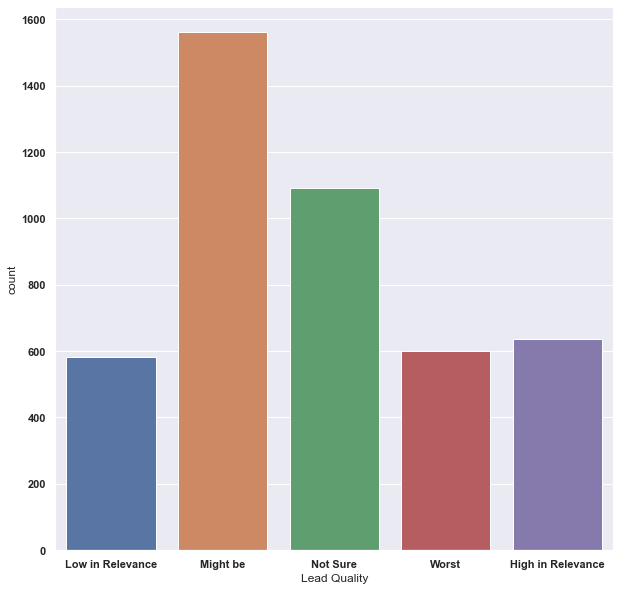

In [18]:

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 35}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 1)
ax = sns.countplot(lead_dataset['Lead Quality'])
plt.show()

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">According to the definition Lead Quality is defined as the quality of lead based on the data and intuition of the employee who has been assigned to the lead.</p>

In [19]:
# Might be has highest frequency
lead_dataset['Lead Quality'].mode()

0    Might be
dtype: object

In [20]:
# Replace null values with 'Might be'
lead_dataset['Lead Quality'] = lead_dataset['Lead Quality'].replace(np.nan, 'Might  be')

In [21]:
# Checking for missing values in Lead Quality column
lead_dataset['Lead Quality'].isnull().sum()

0

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;"> Lets check the column with higher % null values viz. "Asymmetrique Activity Index", "Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score"</p>

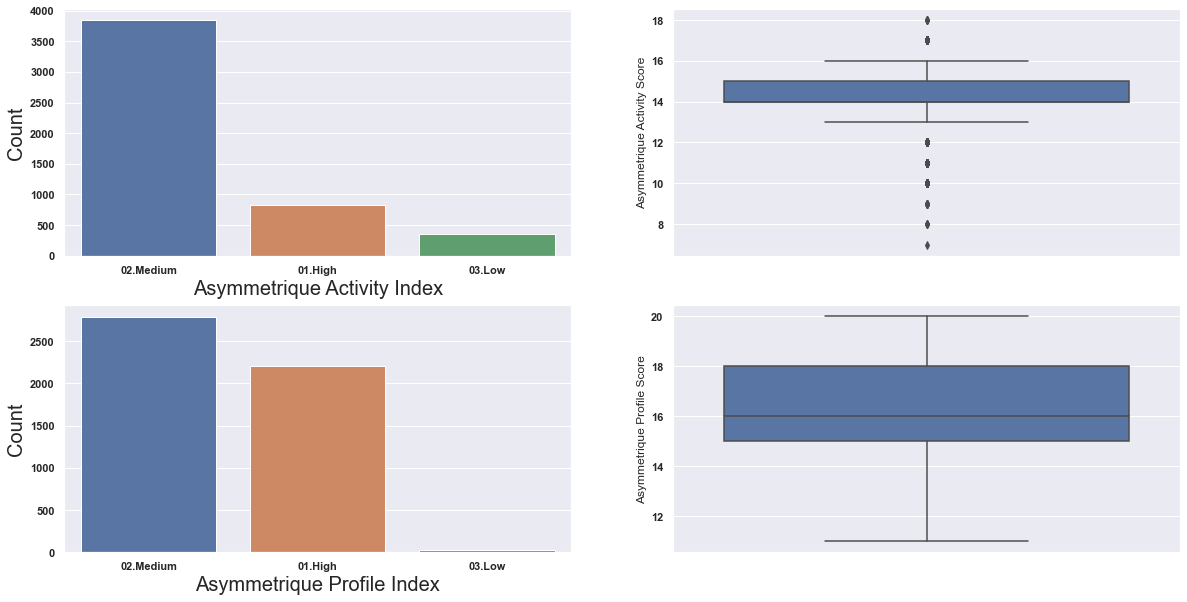

In [22]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 1)


plt.subplot(2,2,1)
ax = sns.countplot(x=lead_dataset["Asymmetrique Activity Index"])
ax.set_xlabel("Asymmetrique Activity Index",fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)

plt.subplot(2,2,2)
ax = sns.boxplot(lead_dataset['Asymmetrique Activity Score'],orient="v")


plt.subplot(2,2,3)
ax = sns.countplot(x=lead_dataset["Asymmetrique Profile Index"])
ax.set_xlabel("Asymmetrique Profile Index",fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)


plt.subplot(2,2,4)
ax = sns.boxplot(lead_dataset['Asymmetrique Profile Score'],orient="v")


<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">These columns does not render any useful information and also na values are high hence by imputing with mean, mode or median will not provide any business insight from these columns and therefore will remove these columns</p>

In [23]:
lead_dataset.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score',
                    'Asymmetrique Profile Index','Asymmetrique Profile Score'],1, inplace = True)

In [24]:
lead_dataset.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,Ringing,Might be,No,No,NaN,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,Ringing,Not Sure,No,No,NaN,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,No,No,Modified


In [25]:
round(100*lead_dataset.isna().sum()/len(lead_dataset),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [26]:
lead_dataset.drop(['Lead Profile','How did you hear about X Education'],1, inplace = True)

In [27]:
lead_dataset.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,Interested in other courses,Low in Relevance,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,Ringing,Might be,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [28]:
lead_dataset.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [29]:
lead_dataset.shape

(9240, 30)

In [30]:
lead_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [31]:
round(100*lead_dataset.isna().sum()/len(lead_dataset),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">Check any imbalance in data</p>

In [32]:
# Try skew function for this
round(lead_dataset.skew(skipna=True),2)

Lead Number                     0.14
Converted                       0.47
TotalVisits                    19.91
Total Time Spent on Website     0.96
Page Views Per Visit            2.87
dtype: float64

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">if skew number is less than -1 and greater than 1 then then data distribution is highly skewed and need to treat that.</p>


In [33]:
lead_dataset.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

Text(0, 0.5, 'Count')

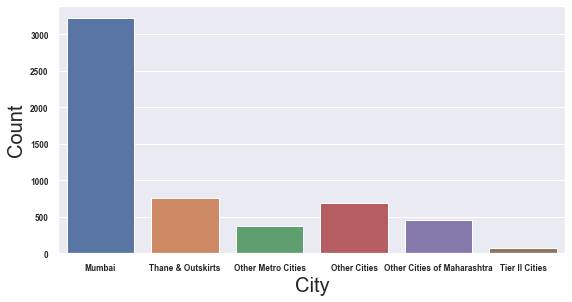

In [34]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 0.75)


plt.subplot(2,2,1)
ax = sns.countplot(x=lead_dataset["City"])
ax.set_xlabel("City",fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)

In [35]:
# As can be seen here Mumbai has largest number of visitor and hence replace with nan
lead_dataset['City'] = lead_dataset['City'].replace(np.nan, 'Mumbai')

In [36]:
# Check now null values 
round(100*lead_dataset.isna().sum()/len(lead_dataset),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

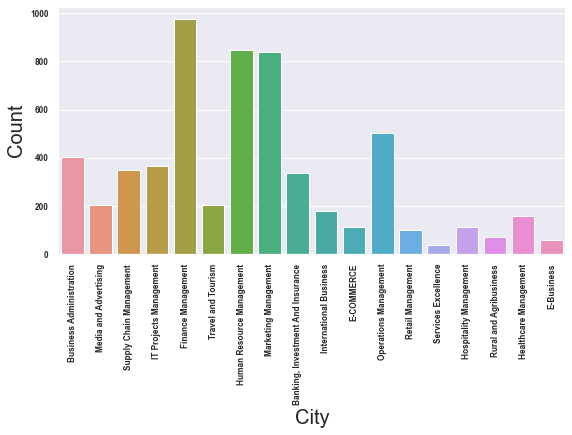

In [37]:
# Try to check Specialization columns
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 0.75)


plt.subplot(2,2,1)
ax = sns.countplot(x=lead_dataset["Specialization"])
ax.set_xlabel("City",fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
plt.xticks(rotation=90)
plt.show()

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">'Finance Management' has highest frequency. This Specialization is the industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.</p>

In [38]:
#checking value counts of Specialization column
lead_dataset['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [39]:
lead_dataset.Specialization.unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [40]:
lead_dataset.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">Replacing null values in the Specialization column with 'others'</p>

In [41]:
lead_dataset['Specialization'] = lead_dataset['Specialization'].replace(np.nan, 'Others')

In [42]:
# Verifying the null values for all the columns now again after imputing the values for 'Specialization'
round(100*lead_dataset.isna().sum()/len(lead_dataset),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [43]:
#Check Country COlumn now 
lead_dataset['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Canada                     4
Germany                    4
Nigeria                    4
South Africa               4
Sweden                     3
Italy                      2
Bangladesh                 2
Belgium                    2
Uganda                     2
Philippines                2
Netherlands                2
Ghana                      2
China                      2
Asia/Pacific Region        2
Malaysia                   1
Sri Lanka                  1
Kenya                      1
Denmark                    1
Vietnam                    1
Indonesia     

In [44]:
# Replace null values with mode which in this case is  'India'
lead_dataset['Country'].fillna('India', inplace = True)

In [45]:
lead_dataset['Country'].isna().sum()

0

In [46]:
lead_dataset['Country'] = lead_dataset['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
lead_dataset['Country'].value_counts()

India            8953
Outside India     287
Name: Country, dtype: int64

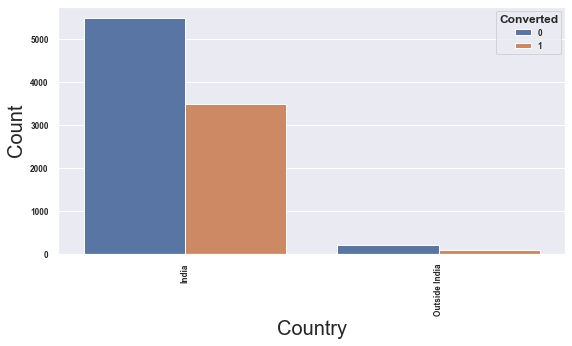

In [47]:
#plotting 

from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 0.75)


plt.subplot(2,2,1)
ax = sns.countplot(lead_dataset.Country, hue=lead_dataset.Converted)
ax.set_xlabel("Country",fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
plt.xticks(rotation=90)
plt.show()




Number for India is very high and hence this column can be dropped

In [48]:
lead_dataset.drop(['Country'],1, inplace = True)

In [49]:
# Check now null values 
round(100*lead_dataset.isna().sum()/len(lead_dataset),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [50]:
#checking Tags column
lead_dataset['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

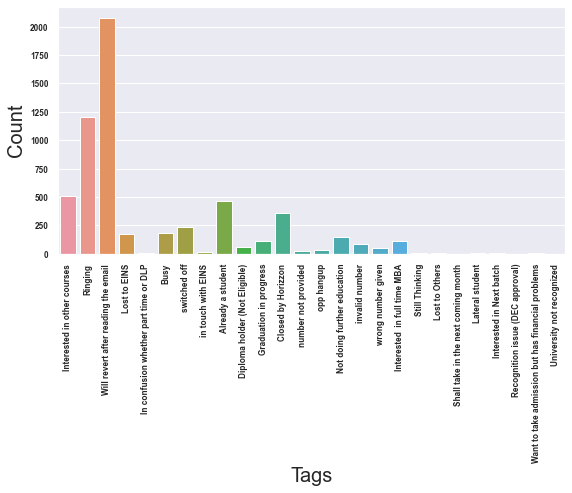

In [51]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 0.75)


plt.subplot(2,2,1)
ax = sns.countplot(lead_dataset.Tags)
ax.set_xlabel("Tags",fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
plt.xticks(rotation=90)
plt.show()

In [52]:
lead_dataset.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">Tags is defined as the tags assigned to customers indicating the current status of the lead. Will replace null values with Not Specified</p>

In [53]:
lead_dataset.Tags.unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [54]:
# So here we shall impute with the value 'Will revert after reading the email'
lead_dataset['Tags'] = lead_dataset['Tags'].replace(np.nan, 'Not Specified')

In [55]:
# Verifying the null values for all the columns now again after imputing the values for 'Specialization'
round(100*lead_dataset.isna().sum()/len(lead_dataset),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

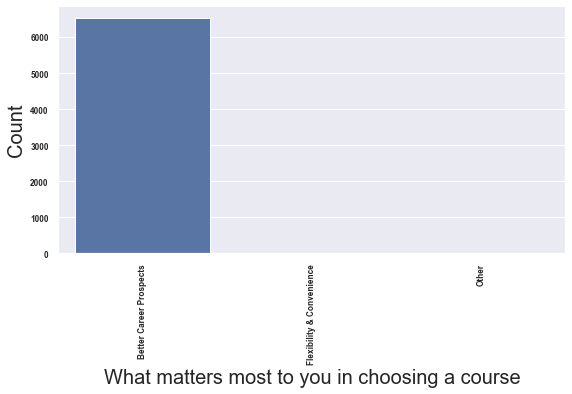

In [56]:
# Check next column which is 'What matters most to you in choosing a course'
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 0.75)


plt.subplot(2,2,1)
ax = sns.countplot(lead_dataset['What matters most to you in choosing a course'])
ax.set_xlabel("What matters most to you in choosing a course",fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
plt.xticks(rotation=90)
plt.show()

In [57]:
lead_dataset['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">mostly people go for a course for better career prospects, hence replace the null value with same </p>

In [58]:
lead_dataset['What matters most to you in choosing a course'] = lead_dataset['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')


In [59]:
# Verifying the null values for all the columns now again after imputing the values for 'Specialization'
round(100*lead_dataset.isna().sum()/len(lead_dataset),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

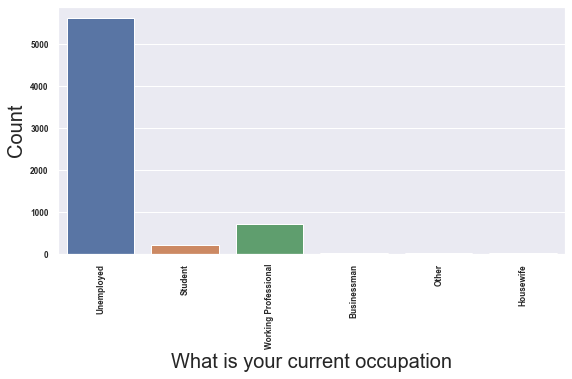

In [60]:
# The next column is 'What is your current occupation'
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 0.75)


plt.subplot(2,2,1)
ax = sns.countplot(lead_dataset['What is your current occupation'])
ax.set_xlabel("What is your current occupation",fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
plt.xticks(rotation=90)
plt.show()

In [61]:
lead_dataset['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [62]:
# Most numbers are unemployed and will impute NaN values with 'Unemployed'.

lead_dataset['What is your current occupation'] = lead_dataset['What is your current occupation'].replace(np.nan, 'Unemployed')

In [63]:
# Verifying the null values for all the columns now again after imputing the values
round(100*lead_dataset.isna().sum()/len(lead_dataset),2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [64]:
#checking Lead Source column
lead_dataset['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
welearnblog_Home        1
testone                 1
blog                    1
Pay per Click Ads       1
youtubechannel          1
WeLearn                 1
Name: Lead Source, dtype: int64

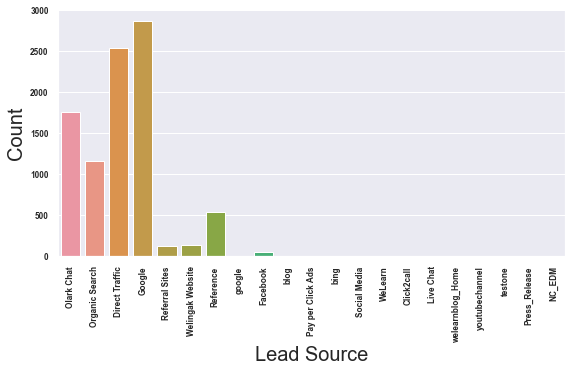

In [65]:
# Lead Source- The source of the lead. Includes Google, Organic Search, Olark Chat, etc.

from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 0.75)


plt.subplot(2,2,1)
ax = sns.countplot(lead_dataset['Lead Source'])
ax.set_xlabel("Lead Source",fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
plt.xticks(rotation=90)
plt.show()

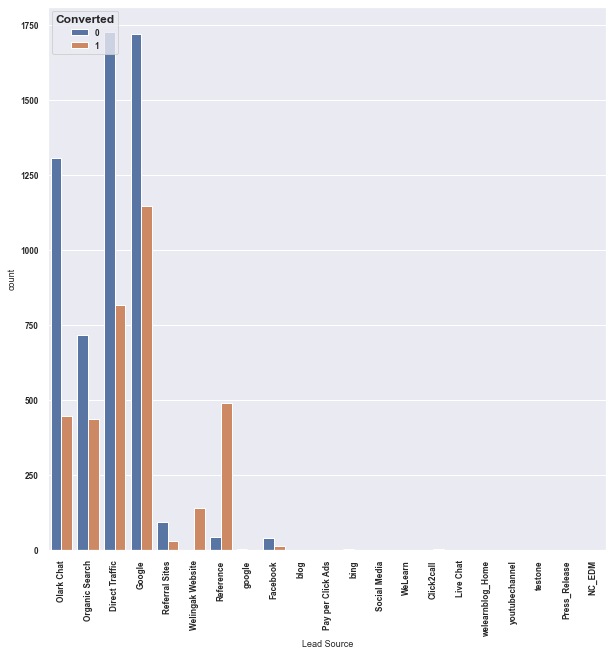

In [66]:
plt.figure(figsize=(10,10))
ax=sns.countplot(lead_dataset['Lead Source'], hue=lead_dataset.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [67]:
lead_dataset['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">"Google" and "google" are same. some  categorize viz. 'blog',  'Live Chat','welearnblog_Home', 'youtubechannel' etcc can be grouped into 'Others'.</p>

In [68]:
lead_dataset['Lead Source'] = lead_dataset['Lead Source'].replace(['google'], 'Google')
lead_dataset['Lead Source'] = lead_dataset['Lead Source'].replace([ 'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 
                                                  'Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel', 'testone', 
                                                   'Press_Release', 'NC_EDM','Null'], 'Others')

In [69]:
#lead_dataset['Lead Source'] = lead_dataset['Lead Source'].fillna('Null')  
lead_dataset['Lead Source'] = lead_dataset['Lead Source'].replace(np.nan, 'Others')

In [70]:
lead_dataset['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'Facebook',
       'Others'], dtype=object)

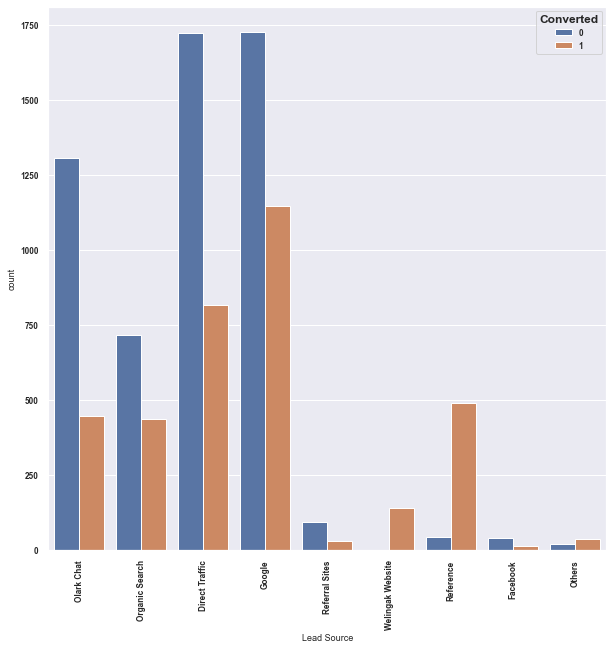

In [71]:
plt.figure(figsize=(10,10))
ax=sns.countplot(lead_dataset['Lead Source'], hue=lead_dataset.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [72]:
# Verifying the null values for all the columns now again after imputing the values
round(100*lead_dataset.isna().sum()/len(lead_dataset),2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [73]:
#checking Last Activity column
lead_dataset['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [74]:
lead_dataset['Last Activity'] = lead_dataset['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                        'View in browser link Clicked', 'Email Marked Spam','Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [75]:
lead_dataset['Last Activity'] = lead_dataset['Last Activity'].replace(np.nan, 'Others')

In [76]:
# Verifying the null values for all the columns now again after imputing the values
round(100*lead_dataset.isna().sum()/len(lead_dataset),2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

###### Imputing total visits Median values

In [77]:
columns_median = ['Total Time Spent on Website', 'Page Views Per Visit','TotalVisits']

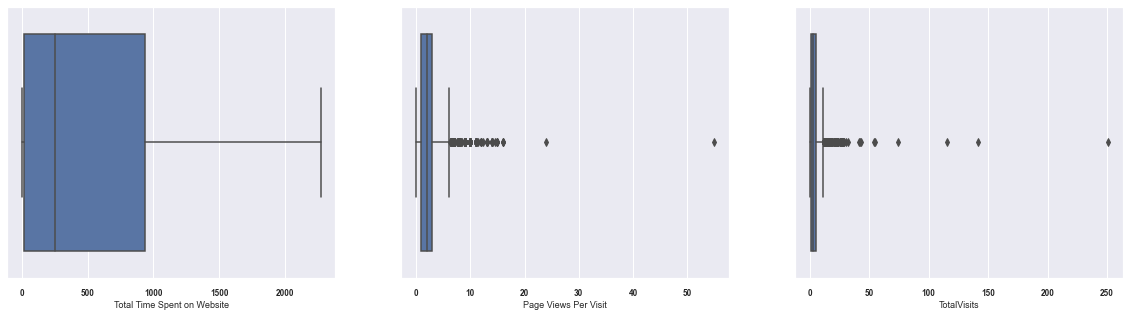

In [78]:
#plotting
plt.figure(figsize = (20, 5))
for i, col in enumerate(columns_median):
    plt.subplot(1,3, i+1)
    sns.boxplot(lead_dataset[col])
plt.show()

###### Imputing total visits and Page views per vissit by  Median values as these continuous variables have outliers


In [79]:
lead_dataset['TotalVisits'].replace(np.NaN, lead_dataset['TotalVisits'].median(), inplace =True)


In [80]:
lead_dataset['Page Views Per Visit'].replace(np.NaN, lead_dataset['Page Views Per Visit'].median(), inplace =True)


In [81]:
# Verifying the null values for all the columns now again after imputing the values
round(100*lead_dataset.isna().sum()/len(lead_dataset),2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

### Inference analysis

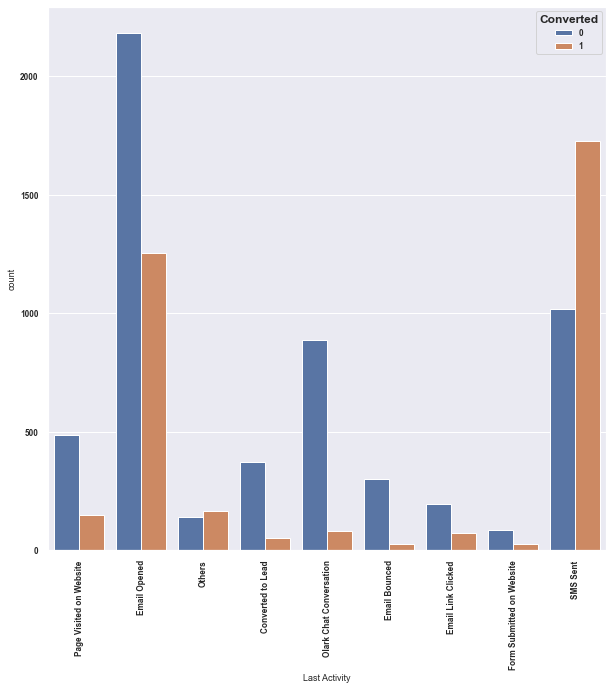

In [82]:
# Last activity
plt.figure(figsize=(10,10))
ax=sns.countplot(lead_dataset['Last Activity'], hue=lead_dataset.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">Conversion rate is much higher by SMS Sent.</p>

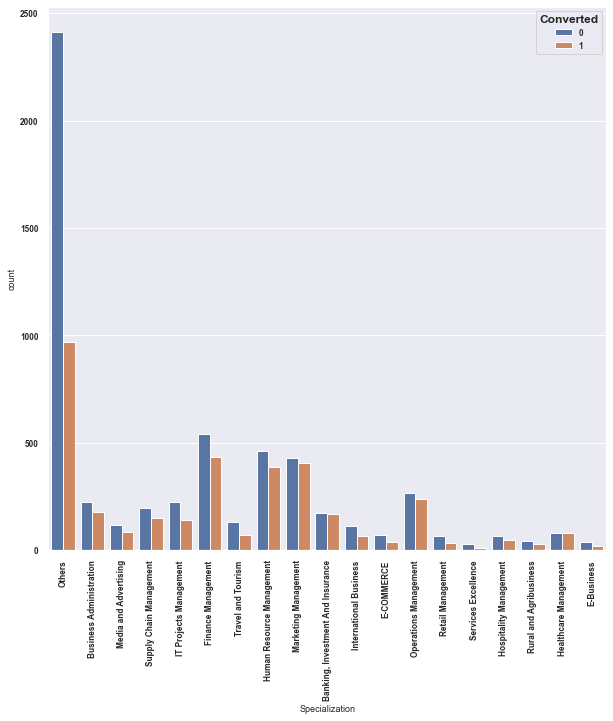

In [83]:
# Visualizing Specialization

plt.figure(figsize=(10,10))
ax=sns.countplot(lead_dataset['Specialization'], hue=lead_dataset.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">Conversion rate is much higher with Specialization as 'Others'.</p>

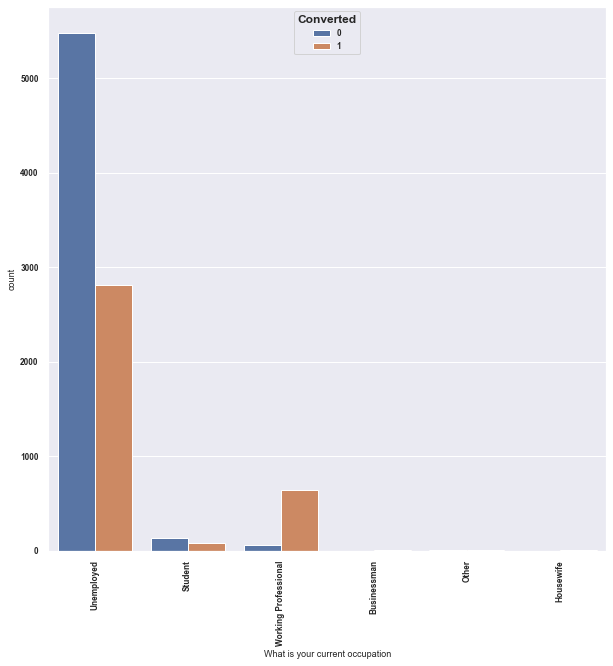

In [84]:
#Visualizing Occupation

plt.figure(figsize=(10,10))
ax=sns.countplot(lead_dataset['What is your current occupation'], hue=lead_dataset.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">Conversion rate is much higher for Unemployed.</p>

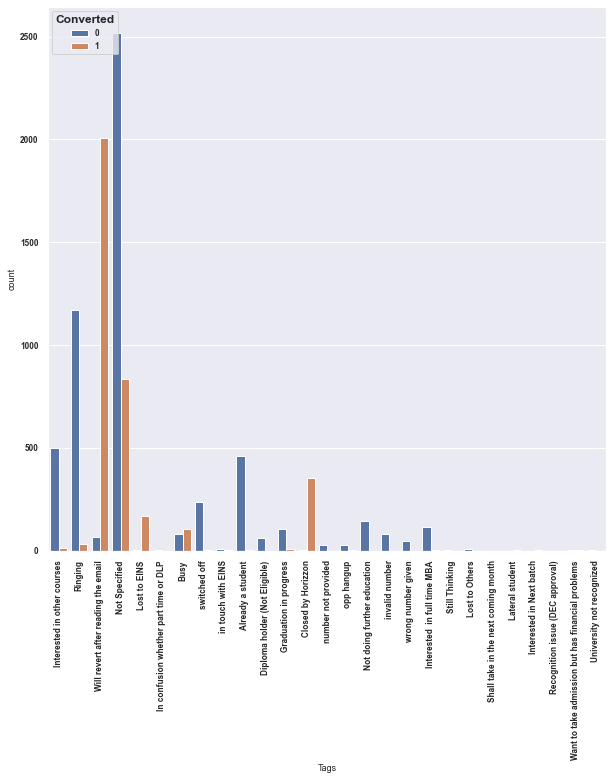

In [85]:
# Visualization for Tags
plt.figure(figsize=(10,10))
ax=sns.countplot(lead_dataset['Tags'], hue=lead_dataset.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">Conversion rate is higher in 'Will revert after reading the email'.</p>

In [86]:
# grouped most of the activities into "Other_Tags"
lead_dataset['Tags'] = lead_dataset['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

In [87]:
lead_dataset['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Not Specified',
       'Lost to EINS', 'Other_Tags', 'Busy', 'switched off',
       'Already a student', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA'], dtype=object)

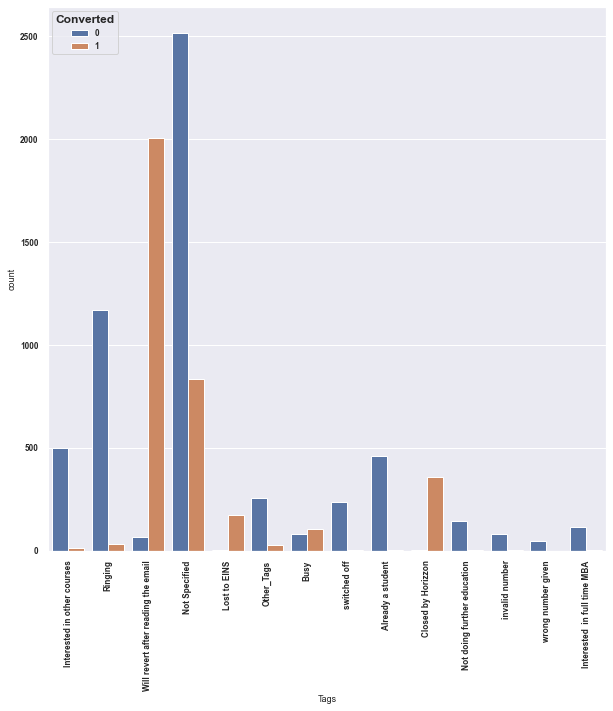

In [88]:
plt.figure(figsize=(10,10))
ax=sns.countplot(lead_dataset['Tags'], hue=lead_dataset.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [89]:
# Verifying the null values for all the columns now again after imputing the values
round(100*lead_dataset.isna().sum()/len(lead_dataset),2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [90]:
lead_dataset['Last Notable Activity'].describe()

count         9240
unique          16
top       Modified
freq          3407
Name: Last Notable Activity, dtype: object

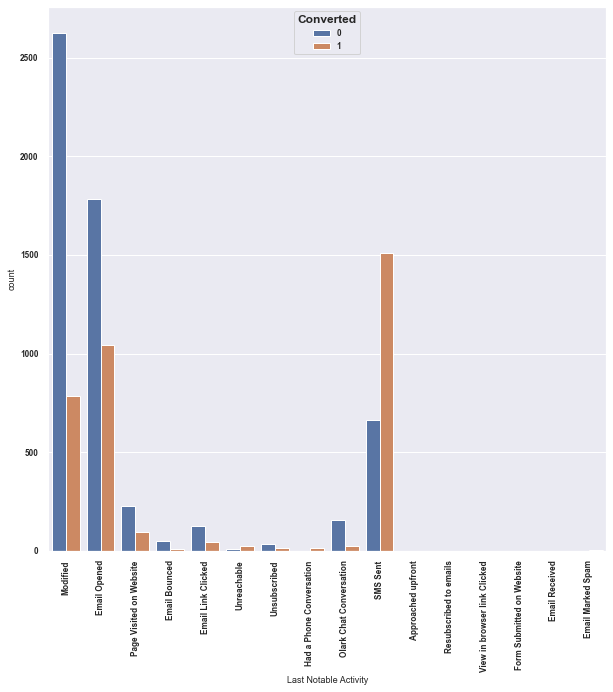

In [91]:
# Visualizing the column.
plt.figure(figsize=(10,10))
ax=sns.countplot(lead_dataset['Last Notable Activity'], hue=lead_dataset.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [92]:
lead_dataset['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">Last few columns viz. 'Approached upfront','Resubscribed to emails', 'View in browser link Clicked','Form Submitted on Website', 'Email Received', 'Email Marked Spam' has no values at all and can be clubed to "Other_Activity.</p>

In [93]:
lead_dataset['Last Notable Activity'] = lead_dataset['Last Notable Activity'].replace(['Approached upfront',
                             'Resubscribed to emails', 'View in browser link Clicked',
                              'Form Submitted on Website', 'Email Received', 'Email Marked Spam'], 
                                                                  'Other_Last_Notable_Activity')

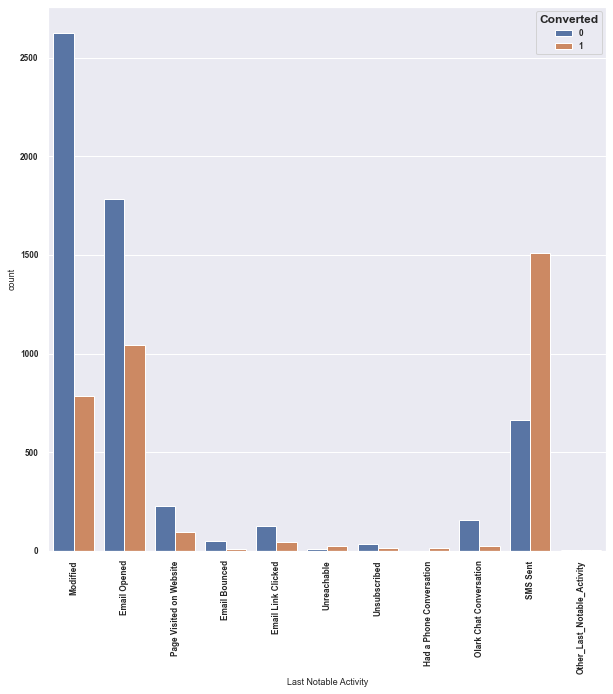

In [94]:
plt.figure(figsize=(10,10))
ax=sns.countplot(lead_dataset['Last Notable Activity'], hue=lead_dataset.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [95]:
lead_dataset['What matters most to you in choosing a course'].describe()

count                        9240
unique                          3
top       Better Career Prospects
freq                         9237
Name: What matters most to you in choosing a course, dtype: object

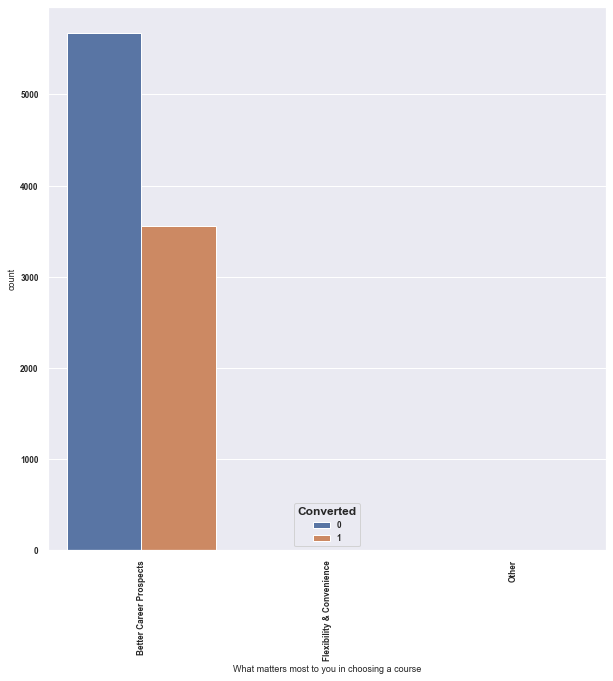

In [96]:
plt.figure(figsize=(10,10))
ax=sns.countplot(lead_dataset['What matters most to you in choosing a course'], hue=lead_dataset.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">It can be observed that although course will be choosen for better career prospects the conversion rate is really low.</p>

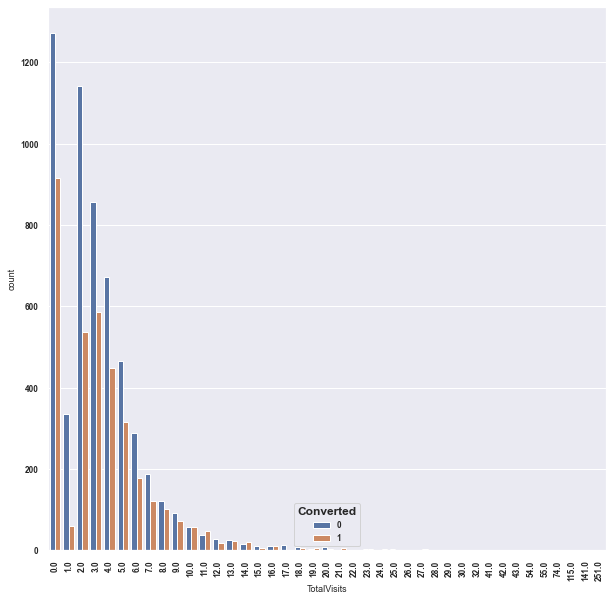

In [97]:
plt.figure(figsize=(10,10))
ax=sns.countplot(lead_dataset['TotalVisits'], hue=lead_dataset.Converted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">The people who visited less number of times have converted this shows education company need to rethink about campainging or website etcc</p>

In [98]:
lead_dataset.skew()

Lead Number                     0.140451
Converted                       0.471058
TotalVisits                    20.061230
Total Time Spent on Website     0.956450
Page Views Per Visit            2.898954
dtype: float64

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">With above analysis some of the columns does not make sense for business hence can be dropped .</p>

In [99]:
lead_dataset_final= lead_dataset.copy()

In [100]:
lead_dataset_final= lead_dataset_final.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                     'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                     'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                     'Get updates on DM Content','I agree to pay the amount through cheque',
                     'A free copy of Mastering The Interview'],1)

In [101]:
lead_dataset_final.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Might be,Mumbai,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [102]:
lead_dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      9240 non-null   int64  
 1   Lead Origin                      9240 non-null   object 
 2   Lead Source                      9240 non-null   object 
 3   Do Not Email                     9240 non-null   object 
 4   Do Not Call                      9240 non-null   object 
 5   Converted                        9240 non-null   int64  
 6   TotalVisits                      9240 non-null   float64
 7   Total Time Spent on Website      9240 non-null   int64  
 8   Page Views Per Visit             9240 non-null   float64
 9   Last Activity                    9240 non-null   object 
 10  Specialization                   9240 non-null   object 
 11  What is your current occupation  9240 non-null   object 
 12  Tags                

In [103]:
lead_dataset_final.shape

(9240, 16)

#### <p style="font-family: Arial; font-size:1.5em;color:#FF7F50;"> 3. Data Manipulation and fine tuning</p>

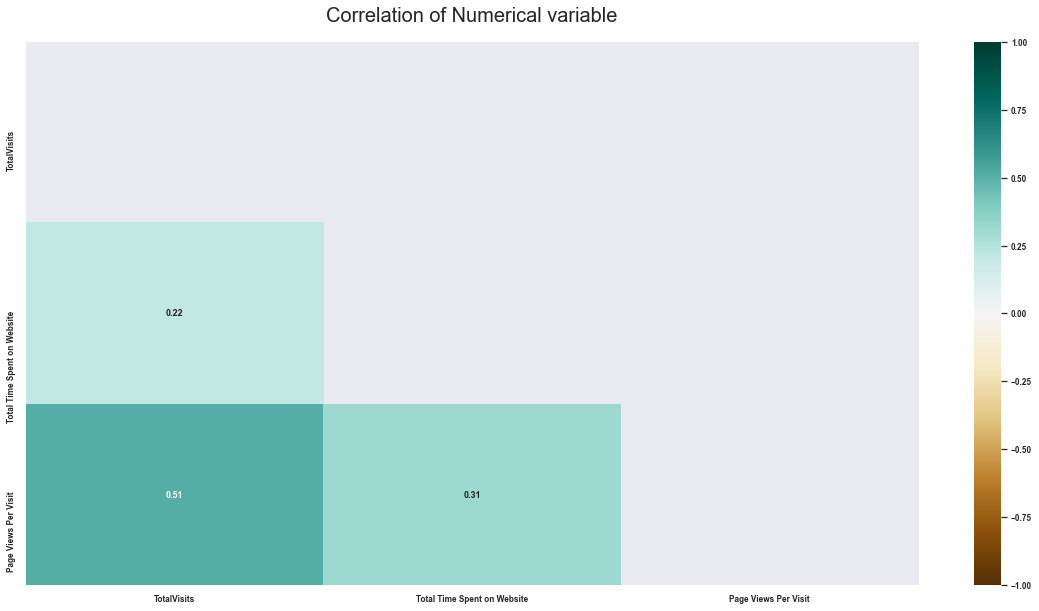

In [104]:
#plotting heatmap which provides co-relation between variables
plt.figure(figsize=(20, 10))
# Using the mask to just show the lower traingular matrix
mask = np.triu(np.ones_like(lead_dataset_final.drop(['Lead Number', 'Converted'], axis = 1).corr(), dtype=np.bool))
heatmap = sns.heatmap(lead_dataset_final.drop(['Lead Number', 'Converted'], axis = 1).corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation of Numerical variable', fontdict={'fontsize':20}, pad=20);
plt.show()


In [105]:
# convert binary variable to numerical binary columns

binary_cols = ['Do Not Email', 'Do Not Call']

lead_dataset_final[binary_cols] = lead_dataset_final[binary_cols].replace({'Yes':1, "No":0})

In [106]:
lead_dataset_final.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Might be,Mumbai,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [107]:
lead_dataset_final.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Last Notable Activity'],
      dtype='object')

In [108]:
dummy_column = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                       'What is your current occupation','Lead Quality','Tags', 'City', 'Last Notable Activity']

In [109]:
# COlumns for dummy variable
dummies = pd.get_dummies(lead_dataset_final[dummy_column], drop_first=True)

# merging data sets
lead_dataset_final = pd.concat([lead_dataset_final, dummies], axis = 1)

In [110]:
lead_dataset_final.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,1,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,1,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,1,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,...,0,0,0,1,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,1,0,0,0,0,0,0


In [111]:
# remove the previous original columns
lead_dataset_final.drop(dummy_column, axis = 1, inplace = True)
lead_dataset_final.shape

(9240, 83)

In [112]:
lead_dataset_final.corr()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,1.000000,-0.098529,0.011913,0.025157,0.021366,0.020329,0.057042,-0.075012,0.029158,0.104726,...,0.014802,0.076414,0.000092,0.080591,-0.031622,-0.007845,0.001868,-0.169987,0.007638,-0.002995
Do Not Email,-0.098529,1.000000,-0.004322,-0.135580,0.033640,-0.046374,0.033404,0.095304,-0.020983,-0.017529,...,-0.037624,-0.188089,-0.011443,0.117259,-0.013032,0.021003,0.049921,-0.025990,-0.010505,0.243408
Do Not Call,0.011913,-0.004322,1.000000,0.018581,0.003241,0.006801,-0.005880,-0.015587,0.023210,-0.001139,...,-0.002032,-0.009769,-0.000573,0.019252,-0.002092,-0.000405,-0.002778,-0.008157,-0.000867,-0.001052
Converted,0.025157,-0.135580,0.018581,1.000000,0.029119,0.362483,-0.005068,-0.051236,0.321702,-0.023695,...,-0.035555,-0.021955,0.043476,-0.244294,-0.072660,0.018607,-0.036051,0.351845,0.036594,-0.012858
TotalVisits,0.021366,0.033640,0.003241,0.029119,1.000000,0.217341,0.512214,0.290871,-0.164679,-0.031862,...,-0.008431,0.036699,0.022438,-0.106902,-0.037440,0.004024,0.227865,-0.003163,0.005721,0.001068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Other_Last_Notable_Activity,-0.007845,0.021003,-0.000405,0.018607,0.004024,0.007997,-0.002130,0.002352,0.006701,-0.002131,...,-0.003803,-0.018281,-0.001073,-0.021043,-0.003914,1.000000,-0.005198,-0.015264,-0.001623,-0.001969
Last Notable Activity_Page Visited on Website,0.001868,0.049921,-0.002778,-0.036051,0.227865,0.026644,0.027158,0.046200,-0.023752,-0.014609,...,-0.026078,-0.125347,-0.007354,-0.144285,-0.026836,-0.005198,1.000000,-0.104656,-0.011129,-0.013499
Last Notable Activity_SMS Sent,-0.169987,-0.025990,-0.008157,0.351845,-0.003163,0.125076,0.056851,0.057507,0.092690,-0.039579,...,-0.076573,-0.368056,-0.021594,-0.423664,-0.078798,-0.015264,-0.104656,1.000000,-0.032679,-0.039637
Last Notable Activity_Unreachable,0.007638,-0.010505,-0.000867,0.036594,0.005721,0.008941,0.019723,0.000291,0.003533,-0.004562,...,-0.008143,-0.039140,-0.002296,-0.045054,-0.008380,-0.001623,-0.011129,-0.032679,1.000000,-0.004215


In [113]:
lead_dataset_final.set_index('Lead Number', inplace = True)

In [114]:
lead_dataset_final.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660728,0,0,0,5.0,674,2.5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
660727,0,0,1,2.0,1532,2.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
660719,0,0,0,1.0,305,1.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660681,0,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [115]:
lead_dataset_final.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,3.438636,487.698268,2.357440,0.528788,0.077706,0.005952,0.000108,...,0.018723,0.305952,0.001515,0.368723,0.019805,0.000758,0.034416,0.235065,0.003463,0.005087
std,0.270435,0.014711,0.486714,4.819024,548.021466,2.145781,0.499198,0.267722,0.076926,0.010403,...,0.135552,0.460835,0.038898,0.482485,0.139338,0.027515,0.182304,0.424062,0.058750,0.071142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
lead_dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 82 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Do Not Call                                           9240 non-null   int64  
 2   Converted                                             9240 non-null   int64  
 3   TotalVisits                                           9240 non-null   float64
 4   Total Time Spent on Website                           9240 non-null   int64  
 5   Page Views Per Visit                                  9240 non-null   float64
 6   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 8   Lead Origin_Lead Import                            

#### <p style="font-family: Arial; font-size:1.5em;color:#FF7F50;"> 4. Model Preparation</p>

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">Create Train Test data set from lead_dataset_final </p>

In [117]:
# dropped a target variable in this case its converted and remaining in X
X = lead_dataset_final.drop(['Converted'], axis=1)

In [118]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660728,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
660727,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
660719,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660681,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [119]:
# Put Target variable in "Convereted" into y
y = lead_dataset_final['Converted']
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [120]:
# Split the data into train and test: here used 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### <p style="font-family: Arial; font-size:1.5em;color:#FF7F50;"> 5.Feature Scaling</p>

In [121]:
# Scaling:

scaler = StandardScaler()

X_train[['Total Time Spent on Website', 'Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website', 'Page Views Per Visit',
                                                                                                               'TotalVisits']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,
641410,0,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
597687,0,0,0.100767,0.005716,-0.470569,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
626825,0,0,0.290067,-0.691418,0.070401,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
587928,0,0,0.290067,1.365219,1.226321,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
622366,0,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [122]:
### check how many people had converted 
conversion_rate = (sum(lead_dataset_final['Converted'])/len(lead_dataset_final['Converted'].index))*100
conversion_rate

38.53896103896104

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">We have around ~39% conversion rate. As it is not high imbalanced .no additional treatment has been caried out</p>

#### <p style="font-family: Arial; font-size:1.5em;color:#FF7F50;"> 6.Model Building:</p>

In [123]:
# Use Logistic regression model from statsmodule
logis_reg_m1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logis_reg_m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6386
Model Family:                Binomial   Df Model:                           81
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1192.6
Date:                Mon, 10 Jan 2022   Deviance:                       2385.2
Time:                        17:00:47   Pearson chi2:                 1.97e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.1907      1.901     -2.204      0.027      -7.917      -0.465
Do Not Email                                            -0.8073      0.316     -2.553      0.011      -1.427      -0.188
Do Not Call                                             20.6051    8.6e+04      0.000      1.000   -1.69e+05    1.69e+05
TotalVisits                                              0.1576      0.043      3.634      0.000       0.073       0.243
Total Time Spent on Website                              1.0529      0.063     16.610      0.000       0.929       1.177
Page Views Per Visit                                    -0.0317      0.073     -0.431      0.666      -0.176       0.112
Lead Origin_Landing Page Submission                     -0.6557      0.235     -2.792      0.005      -1.116      -0.195
Lead Origin_Lead Add Form                                1.2436      1.027      1.210      0.226      -0.770       3.257
Lead Origin_Lead Import                                  0.9902      1.684      0.588      0.556      -2.310       4.290
Lead Origin_Quick Add Form                              24.0225   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Facebook                                    -1.3355      1.683     -0.794      0.427      -4.634       1.963
Lead Source_Google                                       0.1760      0.163      1.078      0.281      -0.144       0.496
Lead Source_Olark Chat                                   0.8914      0.232      3.840      0.000       0.436       1.346
Lead Source_Organic Search                               0.0611      0.215      0.285      0.776      -0.360       0.482
Lead Source_Others                                       1.0244      0.820      1.249      0.212      -0.583       2.632
Lead Source_Reference                                   -0.4582      1.092     -0.420      0.675      -2.599       1.682
Lead Source_Referral Sites                              -0.1219      0.461     -0.264      0.791      -1.025       0.782
Lead Source_Welingak Website                             3.9387      1.262      3.120      0.002       1.464       6.413
Last Activity_Email Bounced                             -0.7141      0.799     -0.893      0.372      -2.281       0.852
Last Activity_Email Link Clicked                         1.0399      0.646      1.610      0.107      -0.226       2.306
Last Activity_Email Opened                               0.3669      0.442      0.831      0.406      -0.499       1.232
Last Activity_Form Submitted on Website                  0.6624      0.642      1.031      0.302      -0.597       1.921
Last Activity_Olark Chat Conversation                   -0

<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">There are quite few high significant variables.</p>

#### <p style="font-family: Arial; font-size:1.5em;color:#FF7F50;"> 7.Feature Selectin using RFE</p>

In [124]:
# LogisticRegression from sklearn module
log_reg = LogisticRegression()

# using RFE with 15 variables
rfe = RFE(log_reg, 15)             
rfe = rfe.fit(X_train, y_train)

In [125]:
# For each of the columns whether or not it is on top 15. 'True' means it got selected.
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False])

In [126]:
columns_rfe = X_train.columns[rfe.support_]

In [127]:
columns_rfe

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Lead Quality_Worst', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

#### <p style="font-family: Arial; font-size:1.5em;color:#FF7F50;"> 8.Assessment of the model</p>

In [128]:
X_train_smrfe = sm.add_constant(X_train[columns_rfe])

# Running sm.GLM
logis_reg_m2 = sm.GLM(y_train,X_train_smrfe, family = sm.families.Binomial())
residual = logis_reg_m2.fit()
residual.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1443.5
Date:                Mon, 10 Jan 2022   Deviance:                       2886.9
Time:                        17:00:52   Pearson chi2:                 1.50e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.5002      0.185    -13.489      0.000      -2.863      -2.137
Lead Source_Welingak Website                      4.7009      0.751      6.263      0.000       3.230       6.172
Last Activity_SMS Sent                            2.0512      0.107     19.156      0.000       1.841       2.261
Lead Quality_Worst                               -2.0731      0.613     -3.380      0.001      -3.275      -0.871
Tags_Busy                                         1.6928      0.279      6.067      0.000       1.146       2.240
Tags_Closed by Horizzon                           9.2740      1.022      9.074      0.000       7.271      11.277
Tags_Lost to EINS                                 7.9970      0.763     10.475      0.000       6.501       9.493
Tags_Not Specified                                1.2663      0.189      6.712      0.000       0.897       1.636
Tags_Ringing                                     -2.0888      0.280     -7.448      0.000      -2.639      -1.539
Tags_Will revert after reading the email          6.0297      0.242     24.911      0.000       5.555       6.504
Tags_invalid number                              -2.3761      1.040     -2.284      0.022      -4.415      -0.337
Tags_switched off                                -2.5298      0.546     -4.635      0.000      -3.599      -1.460
Tags_wrong number given                         -21.7700   1.28e+04     -0.002      0.999    -2.5e+04     2.5e+04
Last Notable Activity_Email Link Clicked         -1.4400      0.459     -3.139      0.002      -2.339      -0.541
Last Notable Activity_Modified                   -1.7872      0.116    -15.369      0.000      -2.015      -1.559
Last Notable Activity_Olark Chat Conversation    -1.2553      0.394     -3.185      0.001      -2.028      -0.483
=================================================================================================================
"""

In [129]:
# Variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[columns_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns_rfe].values, i) for i in range(X_train[columns_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.08
14,Last Notable Activity_Olark Chat Conversation,1.05
0,Lead Source_Welingak Website,1.04
3,Tags_Busy,1.04
5,Tags_Lost to EINS,1.04
10,Tags_switched off,1.04
12,Last Notable Activity_Email Link Clicked,1.04
9,Tags_invalid number,1.01
11,Tags_wrong number given,1.01
2,Lead Quality_Worst,0.42


<p style="font-family: Arial; font-size:1.5em;color:#9400D3;">All selected columns has vif below 5 but for variable named Tags_wrong number given high p value hence can be dropped </p>

In [130]:
# removing 'Tags_wrong number given' column
columns_rfe_new = columns_rfe.drop('Tags_wrong number given',1)

In [131]:
columns_rfe_new

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Lead Quality_Worst', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

#### <p style="font-family: Arial; font-size:1.5em;color:#FF7F50;"> 8.2 Model 2 : Again assessing model</p>

In [132]:
X_train_smrfe = sm.add_constant(X_train[columns_rfe_new])
logis_reg_m2 = sm.GLM(y_train,X_train_smrfe, family = sm.families.Binomial())
res = logis_reg_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1448.4
Date:                Mon, 10 Jan 2022   Deviance:                       2896.8
Time:                        17:00:52   Pearson chi2:                 1.47e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6263      0.186    -14.144      0.000      -2.990      -2.262
Lead Source_Welingak Website                      4.6920      0.750      6.256      0.000       3.222       6.162
Last Activity_SMS Sent                            2.0293      0.106     19.062      0.000       1.821       2.238
Lead Quality_Worst                               -2.0131      0.618     -3.257      0.001      -3.224      -0.802
Tags_Busy                                         1.8302      0.278      6.588      0.000       1.286       2.375
Tags_Closed by Horizzon                           9.3895      1.022      9.185      0.000       7.386      11.393
Tags_Lost to EINS                                 8.0971      0.762     10.624      0.000       6.603       9.591
Tags_Not Specified                                1.3974      0.188      7.422      0.000       1.028       1.766
Tags_Ringing                                     -1.9450      0.279     -6.974      0.000      -2.492      -1.398
Tags_Will revert after reading the email          6.1507      0.243     25.350      0.000       5.675       6.626
Tags_invalid number                              -2.2350      1.040     -2.150      0.032      -4.273      -0.197
Tags_switched off                                -2.3848      0.545     -4.377      0.000      -3.453      -1.317
Last Notable Activity_Email Link Clicked         -1.4387      0.458     -3.140      0.002      -2.337      -0.541
Last Notable Activity_Modified                   -1.7746      0.116    -15.284      0.000      -2.002      -1.547
Last Notable Activity_Olark Chat Conversation    -1.2541      0.394     -3.182      0.001      -2.026      -0.482
=================================================================================================================
"""

In [133]:
# again checking the VIF now:
vif = pd.DataFrame()
vif['Features'] = X_train[columns_rfe_new].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns_rfe_new].values, i) for i in range(X_train[columns_rfe_new].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.08
13,Last Notable Activity_Olark Chat Conversation,1.05
0,Lead Source_Welingak Website,1.04
3,Tags_Busy,1.04
5,Tags_Lost to EINS,1.04
10,Tags_switched off,1.04
11,Last Notable Activity_Email Link Clicked,1.04
9,Tags_invalid number,1.01
2,Lead Quality_Worst,0.42
8,Tags_Will revert after reading the email,0.15


<p style="font-family: Arial; font-size:1.5em;color:#9400D3;"> Low VIF and Low p-value. Going forward with this model</p>

In [134]:
# Check Prediction on train data set
y_train_prediction = res.predict(X_train_smrfe)
y_train_prediction[:10]

Lead Number
641410    0.010238
597687    0.226380
626825    0.010238
587928    0.072968
622366    0.047271
613574    0.996142
628456    0.010238
588051    0.993231
649586    0.047271
592598    0.996142
dtype: float64

In [135]:
y_train_prediction = y_train_prediction.values.reshape(-1)
y_train_prediction[:10]

array([0.01023843, 0.22638043, 0.01023843, 0.07296763, 0.04727113,
       0.99614191, 0.01023843, 0.99323089, 0.04727113, 0.99614191])

### Prepare a dataframe for with predicted probabilities and then using 0.5 as threshold for converted or not converted 

In [136]:
y_train_prediction_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_prediction})
y_train_prediction_final['Lead Number'] = y_train.index
y_train_prediction_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.010238,641410
1,0,0.226380,597687
2,0,0.010238,626825
3,0,0.072968,587928
4,0,0.047271,622366


In [137]:
y_train_prediction_final['predicted'] = y_train_prediction_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_prediction_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.010238,641410,0
1,0,0.226380,597687,0
2,0,0.010238,626825,0
3,0,0.072968,587928,0
4,0,0.047271,622366,0


In [138]:
# Creating Confusion matrix 
confusion_matrix = metrics.confusion_matrix(y_train_prediction_final.Converted, y_train_prediction_final.predicted )
print(confusion_matrix)

[[3851  151]
 [ 348 2118]]


In [139]:
# overall accuracy check
print(metrics.accuracy_score(y_train_prediction_final.Converted, y_train_prediction_final.predicted))

0.9228509585652442


### The model has around 92% accuracy.

### check now the specificity and sensitivity

In [140]:
TP = confusion_matrix[1,1] 
TN = confusion_matrix[0,0] 
FP = confusion_matrix[0,1] 
FN = confusion_matrix[1,0] 

In [141]:
# sensitivity of the model

TP / float(TP+FN)

0.8588807785888077

In [142]:
# specificity of the model
TN / float(TN+FP)

0.9622688655672164

In [143]:
# Calculate - prediction converted but actually not
print(FP/ float(TN+FP))

0.03773113443278361


In [144]:
# positive predictive value - prediction converted and actually yes
print (TP / float(TP+FP))

0.9334508594094315


In [145]:
# Negative predictive value - prediction not converted and actually not converted 
print (TN / float(TN+ FN))

0.9171231245534651


### Sensitivity of the model is ~86%


#### <p style="font-family: Arial; font-size:1.5em;color:#FF7F50;"> 9. Plotting the ROC Curve:</p>


In [146]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

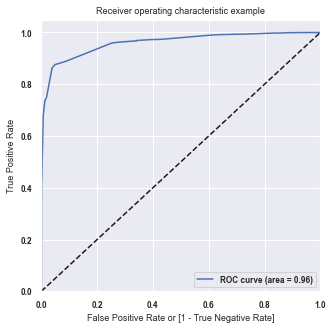

In [147]:
draw_roc(y_train_prediction_final.Converted, y_train_prediction_final.Converted_Prob)

###### 96% area is occupied under the curve, hence model is good

### Get the optimal cut off point , this point is where sensitivity and specificity intersect

In [148]:
# Now instead of 0.5 threshold try with different threshold values
prob_co_numbers = [float(x)/10 for x in range(10)]
for i in prob_co_numbers:
    y_train_prediction_final[i]= y_train_prediction_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_prediction_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.010238,641410,0,1,0,0,0,0,0,0,0,0,0
1,0,0.226380,597687,0,1,1,1,0,0,0,0,0,0,0
2,0,0.010238,626825,0,1,0,0,0,0,0,0,0,0,0
3,0,0.072968,587928,0,1,0,0,0,0,0,0,0,0,0
4,0,0.047271,622366,0,1,0,0,0,0,0,0,0,0,0


In [149]:
# Calulating probabilities based on different cut off numbers
df_cutoff = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

prob_num_cutoff = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in prob_num_cutoff:
    confusion_matrix_new = metrics.confusion_matrix(y_train_prediction_final.Converted, y_train_prediction_final[i] )
    total_sum=sum(sum(confusion_matrix_new))
    accuracy = (confusion_matrix_new[0,0]+confusion_matrix_new[1,1])/total_sum
    specificity = confusion_matrix_new[0,0]/(confusion_matrix_new[0,0]+confusion_matrix_new[0,1])
    sensitivity = confusion_matrix_new[1,1]/(confusion_matrix_new[1,0]+confusion_matrix_new[1,1])
    df_cutoff.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(df_cutoff)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381262     1.000000     0.000000
0.1   0.1  0.830396     0.957015     0.752374
0.2   0.2  0.830396     0.957015     0.752374
0.3   0.3  0.922078     0.875912     0.950525
0.4   0.4  0.922696     0.858881     0.962019
0.5   0.5  0.922851     0.858881     0.962269
0.6   0.6  0.922851     0.858881     0.962269
0.7   0.7  0.892857     0.749392     0.981259
0.8   0.8  0.891311     0.734793     0.987756
0.9   0.9  0.869821     0.669100     0.993503


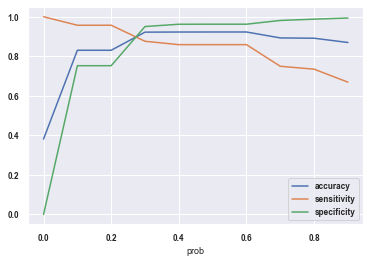

In [150]:
# plotting different matrices for various probabilities.
df_cutoff.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

The accuracy, sensitivity and specificity lines are intersecting at ~0.25 probability. So, we will proceed with this value.

### now use 0.25 as cut off probability and evaluate model


In [151]:
y_train_prediction_final['final_predicted'] = y_train_prediction_final.Converted_Prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_prediction_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.010238,641410,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.226380,597687,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.010238,626825,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.072968,587928,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.047271,622366,0,1,0,0,0,0,0,0,0,0,0,0


In [152]:
# Accuracy check
metrics.accuracy_score(y_train_prediction_final.Converted, y_train_prediction_final.final_predicted)

0.9030612244897959

In [153]:
confusion_matrix_latest = metrics.confusion_matrix(y_train_prediction_final.Converted, y_train_prediction_final.final_predicted )
confusion_matrix_latest

array([[3650,  352],
       [ 275, 2191]], dtype=int64)

In [154]:
TP = confusion_matrix_latest[1,1] 
TN = confusion_matrix_latest[0,0] 
FP = confusion_matrix_latest[0,1] 
FN = confusion_matrix_latest[1,0] 

In [155]:
# sensitivity 
TP / float(TP+FN)

0.8884833738848338

In [156]:
# specificity
TN / float(TN+FP)

0.9120439780109945

In [157]:
# positive predictive value - prediction converted and actually yes
print (TP / float(TP+FP))

0.8615808100668502


In [158]:
# Negative predictive value - prediction not converted and actually not converted 
print (TN / float(TN+ FN))

0.9299363057324841


###### Sensitivity of the model is now 89%

#### <p style="font-family: Arial; font-size:1.5em;color:#FF7F50;"> 10. Precision and Recall</p>

In [159]:
confusion_matrix_new = metrics.confusion_matrix(y_train_prediction_final.Converted, y_train_prediction_final.predicted )
confusion_matrix_new

array([[3851,  151],
       [ 348, 2118]], dtype=int64)

### Precision

TP / TP + FP

In [160]:
confusion_matrix_new[1,1]/(confusion_matrix_new[0,1]+confusion_matrix_new[1,1])

0.9334508594094315

### Recall

TP / TP + FN

In [161]:
confusion_matrix_new[1,1]/(confusion_matrix_new[1,0]+confusion_matrix_new[1,1])

0.8588807785888077

In [162]:
from sklearn.metrics import precision_score, recall_score

In [163]:
precision_score(y_train_prediction_final.Converted, y_train_prediction_final.predicted)

0.9334508594094315

In [164]:
recall_score(y_train_prediction_final.Converted, y_train_prediction_final.predicted)

0.8588807785888077

### Recall and Precision Trade-off

In [165]:
from sklearn.metrics import precision_recall_curve

In [166]:
y_train_prediction_final.Converted, y_train_prediction_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [167]:
pr, re, thresholds = precision_recall_curve(y_train_prediction_final.Converted, y_train_prediction_final.Converted_Prob)

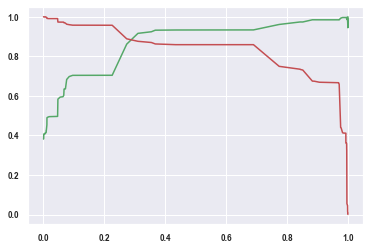

In [168]:
plt.plot(thresholds, pr[:-1], "g-")
plt.plot(thresholds, re[:-1], "r-")
plt.show()

In [169]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                            'Total Time Spent on Website','Page Views Per Visit']])

In [170]:
X_test = X_test[columns_rfe_new]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,Lead Quality_Worst,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
Lead Number,,,,,,,,,,,,,,
619003,0,1,0,0,0,0,1,0,0,0,0,0,0,0
636884,0,1,0,0,0,0,0,0,1,0,0,0,0,0
590281,0,0,0,0,0,0,0,0,1,0,0,0,0,0
579892,0,0,0,0,0,0,0,0,0,0,0,0,1,0
617929,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [171]:
X_test_sm = sm.add_constant(X_test)

In [172]:
# prediction on the test data set:
y_test_pred = res.predict(X_test_sm)

In [173]:
y_test_pred[:10]

Lead Number
619003    0.690077
636884    0.996142
590281    0.971373
579892    0.012118
617929    0.971373
579992    0.996142
643289    0.971373
581637    0.971373
588474    0.047271
609001    0.996142
dtype: float64

In [174]:
# array to dataframe conversion
y_prediction_1 = pd.DataFrame(y_test_pred)
y_prediction_1.head()

,0
Lead Number,
619003,0.690077
636884,0.996142
590281,0.971373
579892,0.012118
617929,0.971373


In [175]:
# Converting y_test to dataframe and indexing that column
y_test_df = pd.DataFrame(y_test)

y_test_df['Lead Number'] = y_test_df.index

In [176]:
# Merging two dataframes
y_test_df.reset_index(drop=True, inplace=True)
y_prediction_1.reset_index(drop=True, inplace=True)

y_prediction_latest = pd.concat([y_test_df, y_prediction_1],axis=1)

In [177]:
y_prediction_latest.head()

,Converted,Lead Number,0
0,1,619003,0.690077
1,1,636884,0.996142
2,1,590281,0.971373
3,0,579892,0.012118
4,1,617929,0.971373


In [178]:
y_prediction_latest= y_prediction_latest.rename(columns={ 0 : 'Converted_Prob'})
y_prediction_latest.head()

,Converted,Lead Number,Converted_Prob
0,1,619003,0.690077
1,1,636884,0.996142
2,1,590281,0.971373
3,0,579892,0.012118
4,1,617929,0.971373


In [179]:
# predicted column with 0.25 probability cutoff
y_prediction_latest['final_predicted'] = y_prediction_latest.Converted_Prob.map(lambda x: 1 if x > 0.25 else 0)
y_prediction_latest.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,1,619003,0.690077,1
1,1,636884,0.996142,1
2,1,590281,0.971373,1
3,0,579892,0.012118,0
4,1,617929,0.971373,1


In [180]:
# overall accuracy.
metrics.accuracy_score(y_prediction_latest.Converted, y_prediction_latest.final_predicted)

0.9051226551226551

In [181]:
confusion_matrix_3 = metrics.confusion_matrix(y_prediction_latest.Converted, y_prediction_latest.final_predicted )
confusion_matrix_3

array([[1523,  154],
       [ 109,  986]], dtype=int64)

In [182]:
TP = confusion_matrix_3[1,1]
TN = confusion_matrix_3[0,0]
FP = confusion_matrix_3[0,1]
FN = confusion_matrix_3[1,0]

In [183]:
# sensitivity
TP / float(TP+FN)

0.9004566210045662

In [184]:
# specificity
TN / float(TN+FP)

0.9081693500298151

In [185]:
confusion_matrix_3[1,1]/(confusion_matrix_3[0,1]+confusion_matrix_3[1,1])

0.8649122807017544

In [186]:
confusion_matrix_3[1,1]/(confusion_matrix_3[1,0]+confusion_matrix_3[1,1])

0.9004566210045662

### Sensitivity of the prediction over test data set is 90%


### Calculating the lead score


In [187]:
# Copying 
lead_test_prediction = y_prediction_latest.copy()
lead_test_prediction.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,1,619003,0.690077,1
1,1,636884,0.996142,1
2,1,590281,0.971373,1
3,0,579892,0.012118,0
4,1,617929,0.971373,1


In [188]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
lead_train_prediction = y_train_prediction_final.copy()
lead_train_prediction.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.010238,641410,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.226380,597687,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.010238,626825,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.072968,587928,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.047271,622366,0,1,0,0,0,0,0,0,0,0,0,0


In [189]:
# Selecting require columns
lead_train_prediction = lead_train_prediction[['Lead Number','Converted','Converted_Prob','final_predicted']]
lead_train_prediction.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,641410,0,0.010238,0
1,597687,0,0.226380,0
2,626825,0,0.010238,0
3,587928,0,0.072968,0
4,622366,0,0.047271,0


In [190]:
# merge two dataframe
lead_prediction = lead_train_prediction.append(lead_test_prediction)
lead_prediction.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,641410,0,0.010238,0
1,597687,0,0.226380,0
2,626825,0,0.010238,0
3,587928,0,0.072968,0
4,622366,0,0.047271,0


In [191]:
print(lead_train_prediction.shape)
print(lead_test_prediction.shape)
print(lead_prediction.shape)

(6468, 4)
(2772, 4)
(9240, 4)


In [192]:
# Check uniqueness 
len(lead_prediction['Lead Number'].unique().tolist())

9240

Lead Score = 100 * ConversionProbability

In [193]:
# Calculating the Lead Score value :Lead Score = 100 * ConversionProbability
lead_prediction['Lead_Score'] = lead_prediction['Converted_Prob'].apply(lambda x : round(x*100))
lead_prediction.head()

,Lead Number,Converted,Converted_Prob,final_predicted,Lead_Score
0,641410,0,0.010238,0,1
1,597687,0,0.226380,0,23
2,626825,0,0.010238,0,1
3,587928,0,0.072968,0,7
4,622366,0,0.047271,0,5


In [194]:
# max lead number
lead_prediction['Lead Number'].max()

660737

In [195]:
# indexing lead number columns

lead_prediction = lead_prediction.set_index('Lead Number').sort_index(axis = 0, ascending = True)
lead_prediction.head()

,Converted,Converted_Prob,final_predicted,Lead_Score
Lead Number,,,,
579533,1,0.977668,1,98
579538,1,0.690077,1,69
579545,0,0.055619,0,6
579546,0,0.355041,1,36
579564,1,0.971373,1,97


In [196]:
# Selecting coefficient of important variable

pd.options.display.float_format = '{:.2f}'.format
imp_params = residual.params[1:]
imp_params

Lead Source_Welingak Website                      4.70
Last Activity_SMS Sent                            2.05
Lead Quality_Worst                               -2.07
Tags_Busy                                         1.69
Tags_Closed by Horizzon                           9.27
Tags_Lost to EINS                                 8.00
Tags_Not Specified                                1.27
Tags_Ringing                                     -2.09
Tags_Will revert after reading the email          6.03
Tags_invalid number                              -2.38
Tags_switched off                                -2.53
Tags_wrong number given                         -21.77
Last Notable Activity_Email Link Clicked         -1.44
Last Notable Activity_Modified                   -1.79
Last Notable Activity_Olark Chat Conversation    -1.26
dtype: float64

In [197]:
# relative value

impt_feature = imp_params
impt_feature = 100.0 * (impt_feature / impt_feature.max())
impt_feature

Lead Source_Welingak Website                      50.69
Last Activity_SMS Sent                            22.12
Lead Quality_Worst                               -22.35
Tags_Busy                                         18.25
Tags_Closed by Horizzon                          100.00
Tags_Lost to EINS                                 86.23
Tags_Not Specified                                13.65
Tags_Ringing                                     -22.52
Tags_Will revert after reading the email          65.02
Tags_invalid number                              -25.62
Tags_switched off                                -27.28
Tags_wrong number given                         -234.74
Last Notable Activity_Email Link Clicked         -15.53
Last Notable Activity_Modified                   -19.27
Last Notable Activity_Olark Chat Conversation    -13.54
dtype: float64

In [198]:
type(impt_feature)

pandas.core.series.Series

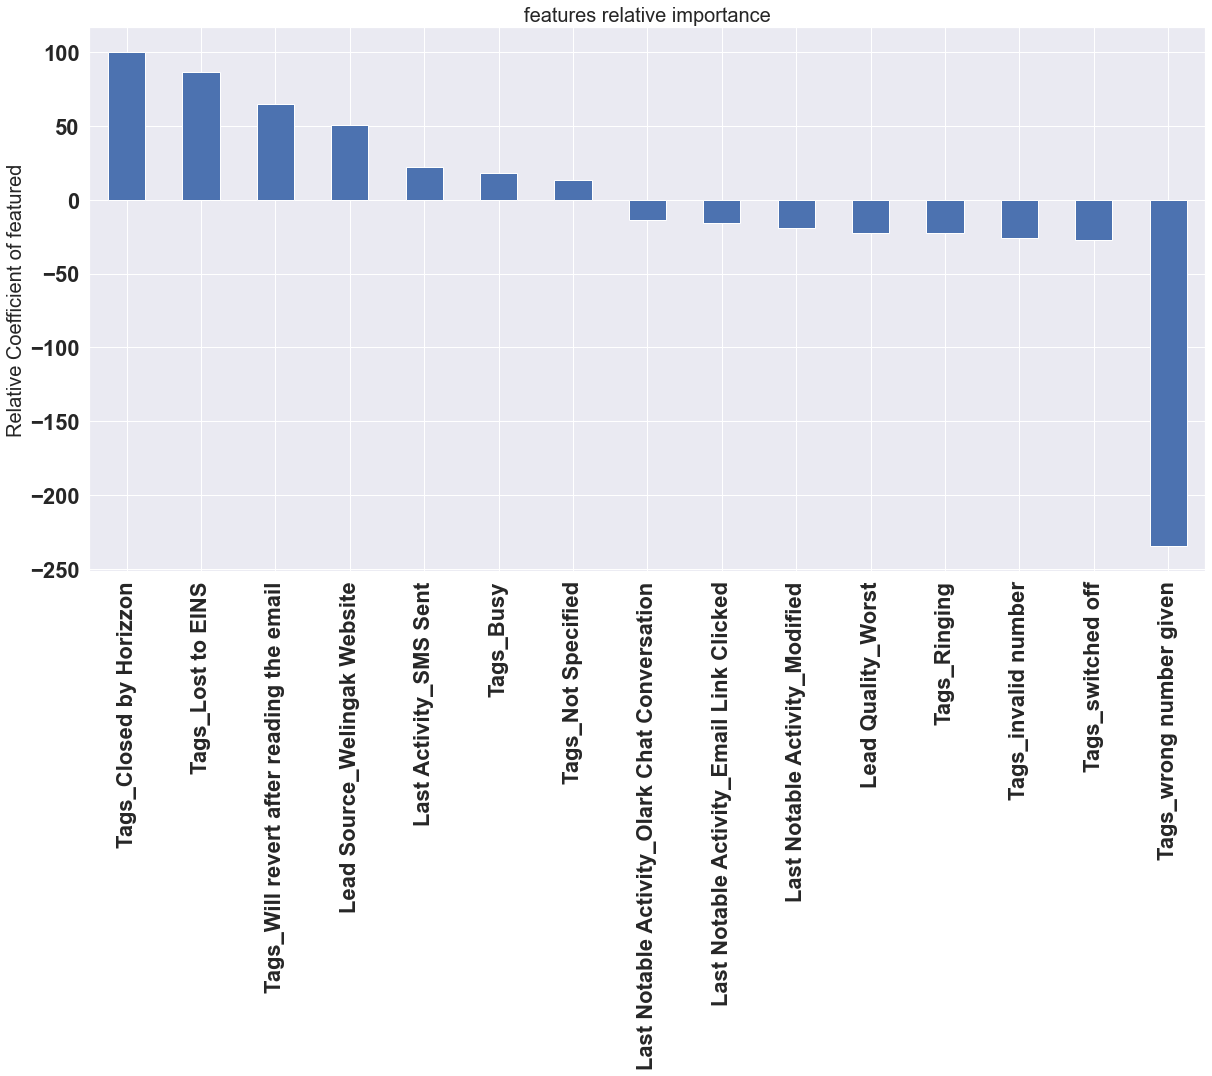

In [199]:
# Plotting relative importance 
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10))
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
sns.set_style("whitegrid")
sns.set(font_scale = 2)



impt_feature.sort_values(ascending=False).plot(kind='bar')
plt.title('features relative importance',fontsize = 20)
plt.ylabel('Relative Coefficient of featured',fontsize = 20)
plt.xticks(rotation=90)
plt.show()



In [200]:
# What are top 5 variables which can provide lead

pd.DataFrame(impt_feature).reset_index().sort_values(by=0,ascending=False).head()

,index,0
4,Tags_Closed by Horizzon,100.00
5,Tags_Lost to EINS,86.23
8,Tags_Will revert after reading the email,65.02
0,Lead Source_Welingak Website,50.69
1,Last Activity_SMS Sent,22.12


#### <p style="font-family: Arial; font-size:1.5em;color:#FF7F50;"> 10. Conclusion</p>

Top 5 variables which can fetch the lead:
    - Tags_Closed by Horizzon
    - Tags_Lost to EINS
    - Tag_We will revert after reading the email
    - Lead Source_Welingak Website
5 variables which need more attention for converting to lead:
    - Tags_wrong number given  
    - Tag_switched off
    - Tag_invalid number
    - Tag ringing
    - Lead Quality worse